## Import Packages

In [1]:
import warnings  # Suppress warnings

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests  # Send HTTP requests
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier

# Models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


warnings.filterwarnings("ignore")

import os  # Interact with the operating system.
import sys  # Read system parameters.
from io import StringIO  # Read and write strings as files
from time import time  # Calculate training time.
from urllib.parse import urlparse  # Parse URL and extract path component

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    RandomForestRegressor,
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_absolute_error,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)

# Summarize software libraries used.
print("Libraries used in this project:")
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- scikit-learn {}".format(sklearn.__version__))
print("- Matplotlib {}".format(matplotlib.__version__))
print("- Seaborn {}".format(sns.__version__))
print("- Python {}\n".format(sys.version))
print("- Matplotlib {}\n".format(matplotlib.__version__))
print("\nSummary of software packages complete.\n")

Libraries used in this project:
- NumPy 1.22.3
- pandas 1.4.1
- scikit-learn 1.2.2
- Matplotlib 3.8.4
- Seaborn 0.13.0
- Python 3.9.20 (main, Oct  3 2024, 02:27:54) 
[Clang 14.0.6 ]

- Matplotlib 3.8.4


Summary of software packages complete.



# Load the Dataset

In [2]:
# Capture URL
url = "https://raw.githubusercontent.com/tyrantdavis/datasets/refs/heads/main/census-adult.data"
request = requests.get(url).text

# LOAD DATA
# Save as data frame and copy
census = pd.read_csv(StringIO(request))
df = census.copy()

# Parse URL
parsed_url = urlparse(url)
path = parsed_url.path
filename = os.path.basename(path)


print(f"Loaded {len(df)} census records from {filename}.")

Loaded 32561 census records from census-adult.data.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Features** 

- age: continuous
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- sex: Female, Male
- capital-gain: continuous
- capital-loss: continuous
- hours-per-week: continuous
- native country: discrete
- income: discrete, >50K, <=50K

**Spotlights** 

- The dataset comprises 32561 rows and 15 columns in total.
- Among these columns, 6 are designated for integer values and 9 for objects.
- No missing records are identified.
- The name for **concave points_worst** will be altered to facilitate access to the feature through dot notation.
- The diagnosis feature classes will be encoded and represented as 0 and 1 opposed to **B**(Benign) and **M**(Malignant)

# Examine Distribution of Income

Before we proceed, it's important to do a bit of preparation. The column names currently have leading spaces, which can make it difficult to access the values. This step will address that issue, allowing for easier access to the data.

In [4]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

### Remove white space from column names

In [5]:
df.columns = df.columns.str.replace(" ", "")

# Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].str.strip()

print("White space removed from the column names.\n\n")
df.columns

White space removed from the column names.




Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
print(df["income"].value_counts(normalize=True))

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64


<Axes: title={'center': 'Count Income Distrbutions'}>

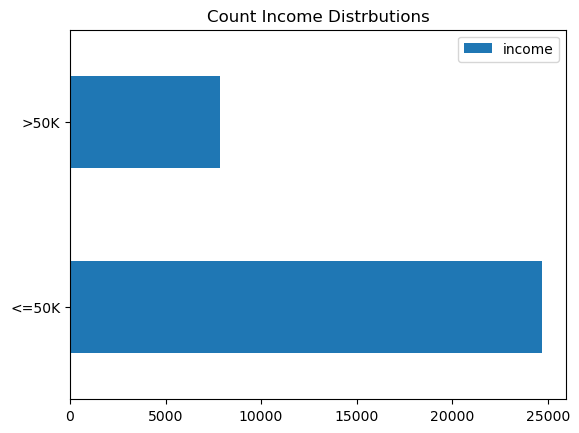

In [7]:
df.income.value_counts(ascending=False).plot(
    kind="barh",
    title="Count Income Distrbutions",
    grid=False,
    legend=True,
)

**Spotlights** 

- Roughly 76% make 50k or less while roughly 24% make more than 50k.

# Create a features dataframe X

To achieve this, the focus will be solely on the attributes specified in the features list. The goal is to transform any categorical features into dummy variables by utilizing pd.get_dummies(). The parameter drop_first=True is set  to remove any unnecessary duplicate features.

In [8]:
features = ["age", "capital-gain", "capital-loss", "hours-per-week", "sex", "race"]

"""Create feature dataframe X with feature columns and dummy variables for categorical features"""
X = pd.get_dummies(df[features], drop_first=True)

**Examine X Samples**

In [9]:
X.head()

,age,capital-gain,capital-loss,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,2174,0,40,1,0,0,0,1
1,50,0,0,13,1,0,0,0,1
2,38,0,0,40,1,0,0,0,1
3,53,0,0,40,1,0,1,0,0
4,28,0,0,40,0,0,1,0,0


# Create the Output Variable 'y'

This is a simple binary classification. It should be assigned a value of 0 if the income is below 50k, and a value of 1 if the income exceeds 50k.

In [10]:
"""Create y"""

y = np.where(df.income == "<=50K", 0, 1)

"""Examine y"""
y

array([0, 0, 0, ..., 0, 0, 1])

# Partition the Dataset

This step generates the Training and Test sets with a Test size of 20%.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

The train and test datasets and labels have been split.


# Instantiate Random Forest Classifier

To begin, we will create an instance of the RandomForestClassifier() using its default settings. Next, we will train the model with the training data and then evaluate its accuracy on the test data, which will serve as a baseline for comparing the performance of other models.

In [13]:
"""Instantiate random forest classifier, fit and score with default parameters"""

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)
print(
    f"Accuracy score for default random forest: {round(rf.score(x_test, y_test)*100,3)}%"
)

Accuracy score for default random forest: 81.928%


**Spotlights** 

The classifier achieved a score of roughly 82%. 

# Build and Tune Random Forest Classifiers by Depth

To begin, create an instance of the RandomForestClassifier() using its default settings. Next, train the model with the training data and then evaluate its accuracy on the test data, which will serve as a baseline for comparing the performance of other models.

In [ ]:
"""7 -- Tune the hyperparameter max_depth over a range from 1-25, save scores for test and train set"""

np.random.seed(0)
accuracy_train = []
accuracy_test = []
depths = range(1, 26)
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))

# Find the Largest Accuracy and its Depth

In [ ]:
"""Find the best accuracy and at what depth that occurs"""

best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f"The highest accuracy on the test is achieved when depth: {best_depth}")
print(f"The highest accuracy on the test set is: {round(best_acc*100,3)}%")

# Plot Training and Test Accuracy -vs- Max Depth

Create a graph that displays the performance of both the test and training sets across various depth values.

In [ ]:
plt.plot(depths, accuracy_test, "bo--", depths, accuracy_train, "r*:")
plt.legend(["test accuracy", "train accuracy"])
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.show()

**Spotlights** 

As the max_depth of the model rises, the training accuracy tends to improve, but conversely, the test accuracy starts to decline with the same increase in max_depth. The two graphs converge at a maximum depth of approximately 11, achieving an accuracy of 83%.

# Modify the Random Forest Model

The random forest model will be updated utilizing the max_depth value mentioned earlier and store the feature importances in a dataframe. After that, the results will be arranged  in order and the top five features will be displayed.

In [ ]:
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(
    zip(x_train.columns, best_rf.feature_importances_),
    columns=["feature", "importance"],
)
print("Top 5 random forest features:")
print(feature_imp_df.sort_values("importance", ascending=False).iloc[0:5])

# Create Additional Features and Re-Tune

When examining the education feature, 16 distinct categories ranging from preschool to professional school are found. Instead of creating separate dummy variables for each category, it would be more efficient to group some of these values. There are various methods to achieve this, but opting for a strategy that consolidates the values into three categories is appropriate: High school and below, College to Bachelor's, and Master's and above. A new column will be added to the dataframe named education_bin to reflect these new groupings.

In [ ]:
"""Create two new features, based on education and native country"""

df["education_bin"] = pd.cut(
    df["education-num"],
    [0, 9, 13, 16],
    labels=["HS or less", "College to Bachelors", "Masters or more"],
)

feature_cols = [
    "age",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "sex",
    "race",
    "education_bin",
]

# Recreate X and the Test/Train Split

This stage will incorporate these two new features, allowing for the recreation of X and performance of the test/train split.

In [ ]:
X = pd.get_dummies(df[feature_cols], drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, random_state=1, test_size=0.2, shuffle=True
)

## Find Best Max Depth with Two Additional Features

As done earlier, this process optimizes the random forest classifier by evaluating its performance across various max_depth values. Train a random forest classifier using max_depth values ranging from 1 to 25. Store the accuracy scores for both the training and testing sets in the lists named accuracy_train and accuracy_test.

In [ ]:
np.random.seed(0)
accuracy_train = []
accuracy_test = []
depths = range(1, 10)
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))

# Find the Highest Accuracy and Depth   

To determine the highest accuracy and the corresponding depth at which it occurs in the test data, analyze and compare these findings with the results from the previously optimized model.

In [ ]:
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f"The highest accuracy on the test is achieved when depth: {best_depth}")
print(f"The highest accuracy on the test set is: {round(best_acc*100,3)}%")

**Spotlights** 

- The greatest accuracy is 84.4% at a max_depth of 9 which is an increase from the initial model at 83.5.

# Graph Training & Test Accuracy vs Max Depth

The next step is to graph the training and test accuracy of the models in relation to the max_depth. Let's take a look at how these results stack up against the previously tuned model.

In [ ]:
plt.figure(2)
plt.plot(depths, accuracy_test, "bo--", depths, accuracy_train, "r*:")
plt.legend(["test accuracy", "train accuracy"])
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.show()

**Spotlights** 

The two graphs parallel each other, showing that the test accuracy is slightly elevated, typically by about 1-2%, although in some instances, the difference is even smaller.

It is indeed possible for testing accuracy to surpass training accuracy. When there is a significant gap between the two, it often indicates that the model may be underfitting, meaning it is not fully capturing the patterns present in the data. However, in this situation, the difference is minimal, which suggests that the model is working well. 

## Refit Random Forrest Model Using Previous Max Depth

The following  will enhance the random forest model, adjusting it by applying the max_depth value mentioned earlier, and then storing the feature importances in a dataframe. After that, the results will be organized and displayed as the top five features. Finally, an evaluation is performed to examine how these results stack up against those from the previously optimized model.

In [ ]:
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)
feature_imp_df = pd.DataFrame(
    zip(x_train.columns, best_rf.feature_importances_),
    columns=["feature", "importance"],
)
print("Top 5 random forest features:")
print(feature_imp_df.sort_values("importance", ascending=False).iloc[0:5])